In [1]:
from skimage import data, io, transform
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import signal

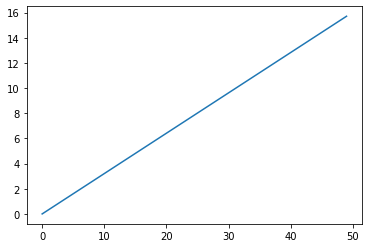

In [2]:
x = np.linspace(0, 5*np.pi, 50)
plt.plot(x)

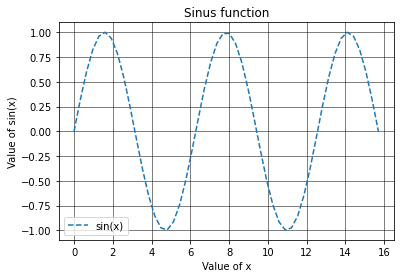

In [6]:
plt.figure()
y = np.sin(x)
plt.plot(x, y,"--")
plt.ylabel("Value of sin(x)")
plt.xlabel("Value of x")
plt.title("Sinus function")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.legend(['sin(x)'])

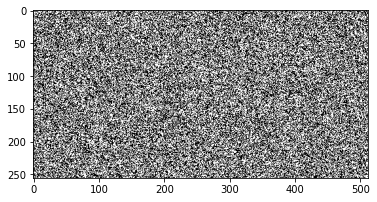

In [7]:
plt.figure()
rand_img = np.random.rand(256, 512)
plt.imshow(rand_img>0.5,cmap='gray')

Text(0.5, 1.0, 'Lena in RGB')

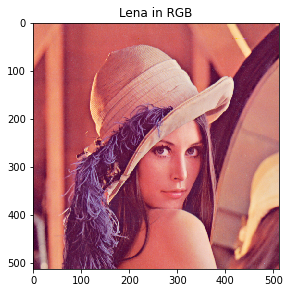

In [9]:
image = io.imread("./imgs/lena.png")
fig, ax = plt.subplots()
io.imshow(image)
plt.title('Lena in RGB')

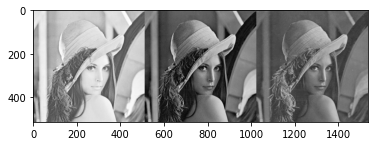

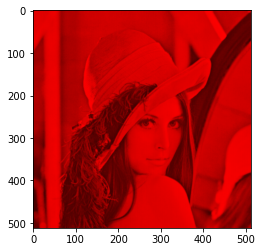

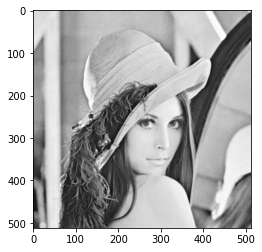

In [10]:
plt.figure()
plt.imshow(np.concatenate((image[:,:,0], image[:,:,1], image[:,:,2]),1),cmap='gray')
image_R = np.array(image)
image_R[:,:,1:] = 0
plt.figure()
plt.imshow(image_R)
plt.figure()
img = image_R[:,:,0].astype(dtype=np.uint8)
plt.imshow(image[:,:,0],cmap='gray')

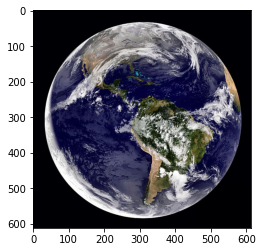

In [11]:
image_earth = io.imread("imgs/earth.jpg")
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(image_earth)
ax.set_aspect('equal')

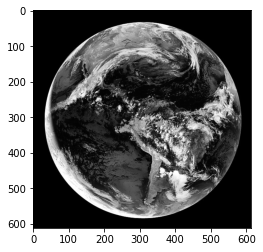

In [12]:
image_earth = io.imread("imgs/earth.jpg")
i_gray = 0.2126 * image_earth[:,:,0] + 0.7152 * image_earth[:,:,1] + 0.0722 * image_earth[:,:,2]
i_gray = i_gray.astype(dtype=np.uint8)
plt.figure()
plt.imshow(i_gray, cmap='gray')

Sum error between methods:  3853
Average error:  0.01028717587252766


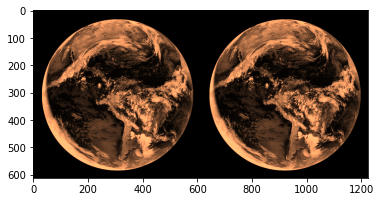

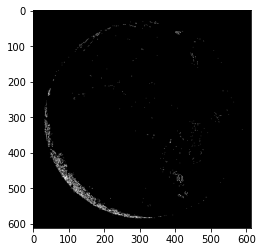

In [13]:
from skimage.color import rgb2gray
#Y = 0.2125 R + 0.7154 G + 0.0721 B scikit
i_gray2 = (rgb2gray(image_earth)*255).astype(dtype=np.uint8)
print("Sum error between methods: ", np.sum((i_gray2 -i_gray)**2))
print("Average error: ", np.sum((i_gray2 -i_gray)**2)/i_gray2.size)

plt.figure()
plt.imshow(np.concatenate((i_gray, i_gray2),1),cmap='copper')
plt.figure()
plt.imshow(i_gray-i_gray2,cmap='gray')

Sum error between methods:  287.529322081418
Average error:  0.0007676783557643909


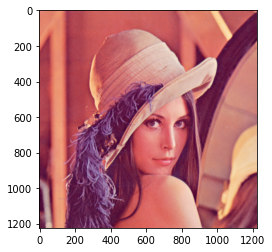

In [14]:
I_resized = transform.resize(image, np.array(i_gray.shape)*2,order=1)
I_resized2 = transform.resize(image, np.array(i_gray.shape)*2, order=5)
print("Sum error between methods: ", np.sum((I_resized -I_resized2)**2))
print("Average error: ", np.sum((I_resized -I_resized2)**2)/i_gray2.size)

plt.figure()
plt.imshow(I_resized)

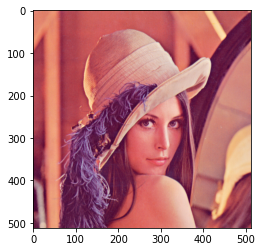

In [15]:
I_rotated = transform.rotate(image,360,resize=True)
plt.figure()
plt.imshow(I_rotated)

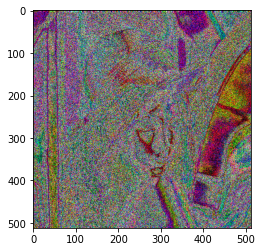

In [16]:
plt.figure()
plt.imshow(image**2)

Text(0.5, 1.0, 'Convolved image')

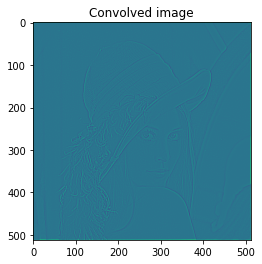

In [17]:
plt.figure()
g = np.array(np.array([[1, 2, 1]]) * np.array([[1], [2], [1]]) / 16)
plt.imshow(signal.convolve2d(rgb2gray(image),g))
conv_img = signal.convolve2d(rgb2gray(image),g,'same')
plt.imshow(rgb2gray(image)-conv_img)
plt.title('Convolved image')

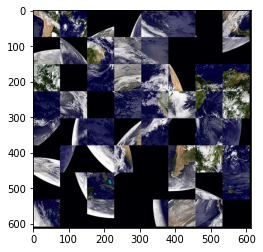

In [18]:
picture = io.imread("imgs/earth.jpg")
rows = picture.shape[0]
cols = picture.shape[1]
generate = np.zeros((rows, cols, 3),dtype='uint8')
x_parts = 8
y_parts = 8
x_step = int(rows/x_parts)
y_step = int(cols/y_parts)
position = []

for i in range(x_parts):
    for j in range(y_parts):
        position.append((i,j))
position = random.sample(position,x_parts*y_parts)

for i in range(x_parts):
    for j in range(y_parts):
        x_p = position[j+y_parts*i][0]*x_step
        y_p = position[j+y_parts*i][1]*y_step
        x_g = i*x_step
        y_g = j*y_step
        generate[x_p:x_p+x_step,y_p:y_p+y_step] = picture[x_g:x_g+x_step, y_g:y_g+y_step]
plt.imshow(generate)